In [2]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(0)

# Matrice de Gram, de correlation et forme quadratique

Dans la suite, on considère que $\mathbf M$ est une matrice de similarité, elle est donc positive : $\forall (i,j)\ M_{ij}\geq 0$. Ici, on prendra juste une matrice de 10 par 10 tirée uniformément aléatoirement entre 0 et 1. 

In [3]:
M = rng.random(size=(10,10))*2 - 1
M = np.abs(M)
M

array([[0.09762701, 0.43037873, 0.20552675, 0.08976637, 0.1526904 ,
        0.29178823, 0.12482558, 0.783546  , 0.92732552, 0.23311696],
       [0.58345008, 0.05778984, 0.13608912, 0.85119328, 0.85792788,
        0.8257414 , 0.95956321, 0.66523969, 0.5563135 , 0.7400243 ],
       [0.95723668, 0.59831713, 0.07704128, 0.56105835, 0.76345115,
        0.27984204, 0.71329343, 0.88933783, 0.04369664, 0.17067612],
       [0.47088878, 0.54846738, 0.08769934, 0.1368679 , 0.9624204 ,
        0.23527099, 0.22419145, 0.23386799, 0.88749616, 0.3636406 ],
       [0.2809842 , 0.12593609, 0.39526239, 0.87954906, 0.33353343,
        0.34127574, 0.57923488, 0.7421474 , 0.3691433 , 0.27257846],
       [0.14039354, 0.12279697, 0.97674768, 0.79591038, 0.58224649,
        0.67738096, 0.30621665, 0.49341679, 0.06737845, 0.51114882],
       [0.68206083, 0.77924972, 0.31265918, 0.7236341 , 0.60683528,
        0.26254966, 0.64198646, 0.80579745, 0.67588981, 0.80780318],
       [0.95291893, 0.0626976 , 0.9535221

**Question** On considère que $\mathbf M$ est un ensemble de 10 vecteurs de dimension 10. Calculer la matrice de Gram de $M$, c'est-à-dire, l'ensemble des produits scalaires de tous les vecteurs de $\mathbf M$, les uns avec les autres. Notez $\mathbf W$ cette matrice de Gram de $\mathbf M$

Si $\mathbf M = [v_0,v_1, v_2, \dots, v_9]$ alors $\mathbf W_{i,j}=\langle v_i, v_j\rangle$.

In [ ]:
W = M@M.T

**Question** Donnez l'expression de la matrice de Gram de $\mathbf A$, la matrice $\mathbf A = \begin{pmatrix} a&b\\c&d\end{pmatrix}$

*Réponse*  $\begin{pmatrix} a^2+b^2 & ac+bd\\ac+bd & c^2+d^2 \end{pmatrix}$

**Question** Quelles sont les propriétés de cette matrice? 

*Réponse* : Elle est symétrique et positive

**Question** Calculer le vecteur $\mathbf d$ de la somme des toutes les lignes de $\mathbf W$. Appeler $\mathbf D$ la matrice diagonale de $\mathbf d$ : Elle a pour diagonale le vecteur $\mathbf d$ et des 0 partout ailleurs. 

In [5]:
d = W.sum(axis=1)
D = np.diag(d)

**Question** Donnez l'expression de cette matrice diagonale construite à partir de la matrice de Gram de $\mathbf A$.

*Réponse*

\begin{pmatrix} a^2+b^2 + ac+bd &0 \\0 & ac+bd + c^2+d^2 \end{pmatrix}

**Question** Calculer maintenant la matrice $\mathbf L$ qui vaut $\mathbf D-\mathbf W$ et donnez l'expression dans le cas des matrices construites à partir de $\mathbf A$.

*Réponse*

\begin{pmatrix}  ac+bd & -  (ac+bd) \\ - (ac+bd) & ac+bd \end{pmatrix}

In [6]:
L = D - W

**Question** Si on prend un vecteur $\mathbf v$ quelconque, on va pouvoir observer que le signe de $\mathbf v^\top \mathbf L\mathbf v$ est toujours positif. 

Dans le cas de la matrice 2x2, vérifiez que cela est bien  vrai. *Aide* : appelez $x=ac+bd$ pour simplifier vos calculs. 

In [7]:
v = rng.random(L.shape[0])*10-5
print(v)
print(v@L@v)

[ 1.77816537 -2.29992027  2.35194022  4.62188545 -2.51246856  0.76157334
  0.92041931  0.72251906 -2.76918367  4.52749012]
1593.9630094021732


*Réponse* : 

$(v_1, v_2) \begin{pmatrix}  x & -  x \\ - x & x \end{pmatrix}\begin{pmatrix}  v_1 \\ v_2 \end{pmatrix} = (x(v_1-v2) , x(v_2-v_1))\begin{pmatrix}v_1\\v_2\end{pmatrix} = x(v_1^2+v_2^2-2v_1v_2) =x(v_1-v_2)^2 \geq 0$.

**Information** Cette propriété de positivité de $v^\top Lv$ est une propriété qui définit la notion de **matrice semi-définie positive** (le semi venant du fait que le résultat peut être nul. Une telle matrice a des valeurs propres qui sont toutes positives.  

**Question** Vérifier que les valeurs propres de $L$ sont positives.

In [8]:
e, V = np.linalg.eig(L)
print(e)

[ 0.         17.10867083 19.35934904 31.53652897 30.53107662 30.23172562
 27.15033786 22.10147522 23.91479882 23.38259964]


# Matrices d'incidences de graphes

On peut représenter un graphe aussi par une matrice d'incidence. Chaque colonne correspond à une arête du graphe et chaque ligne correspond à un noeud. 

La version non pondérée de cette matrice d'incidence pour un graphe non dirigé a un 1 à chacune des extrémités. Plus formellement la matrice d'incidence $\mathbf{BI}$ est définie par $\mathbf{BI}_{ik}=1$ et $\mathbf{BI}_{jk}=1$ si l'arête $k$ relie les noeuds $i$ et $j$ et 0 sinon. 

**Question**  Calculer cette matrice d'incidence pour le graphe non dirigé de deux noeuds qui relie ces deux noeuds. Afficher le résultat du produit de cette matrice par sa transposée.

In [9]:
BI = np.array([[1], [1]])

In [10]:
BI@BI.T

array([[1, 1],
       [1, 1]])

**Question** Même question avec une matrice d'un graphe vue dans le TP précédent.

In [11]:
B = np.array([[0, 1, 0, 0],
              [1, 0, 1, 1],
              [0, 1, 0, 1],
              [0, 1, 1, 0]
             ])

In [16]:
C = np.array([[1,0,0,0], [1,1,1,0], [0,1,0,1], [0,0,1,1]])

In [17]:
C@C.T

array([[1, 1, 0, 0],
       [1, 3, 1, 1],
       [0, 1, 2, 1],
       [0, 1, 1, 2]])

**Question** : Que sera la valeur sur la diagonale du produit  $\mathbf {C} \mathbf{C}^\top$ ? Que sera la valeur des autres cases de ce produit ?

*Réponse* : le degré sur la diagonale, et un 1 en $(i,j)$ si une arête relie les noeuds $i$ et $j$. En effet si $\mathbf{C}$ est cette matrice alors

-  pour tout $i\neq j$,  $\langle\mathbf{C}_{i:},\mathbf{C}_{j:}\rangle = \sum_{k} \mathbf{C}_{ik}\mathbf{C}_{jk}= 1$ si il y a une arête entre $i$ et $j$ par définition et 0 sinon.
- pour tout $i$,  $\langle\mathbf{C}_{i:},\mathbf{C}_{i:}\rangle = \sum_{k} \mathbf{C}_{ik}^2$ qui est le degré du noeud.


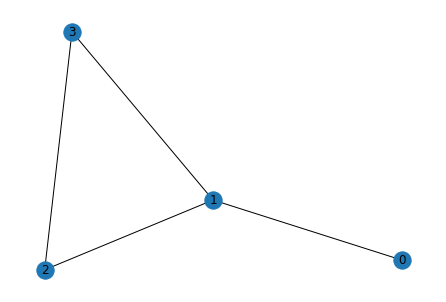

In [14]:
import networkx as nx
G = nx.Graph(B)
nx.draw(G, with_labels=True)

**Question** Calculer la matrice laplacienne $\mathbf L = \mathbf D - \mathbf B$ où $\mathbf D$ est la matrice diagonale des degrés de $\mathbf B$. Comparer avec $\mathbf {C}\mathbf C^\top$. 

In [15]:
L = np.diag(B.sum(axis=1)) - B
L

array([[ 1, -1,  0,  0],
       [-1,  3, -1, -1],
       [ 0, -1,  2, -1],
       [ 0, -1, -1,  2]])

**Question** Soit $\mathbf f$ un vecteur qui associe une valeur à chaque noeud du graphe. Elle est égale à 1 pour le noeud 0 et à 0 pour le neud 3. Vérifier que la forme quadratique $\mathbf f^\top L\mathbf f$ est bien minimale si on choisit des valeurs pour 1 et 2 qui minimisent les écarts entre les valeurs des noeuds. 

In [25]:
f = np.array([[0, 0.58, 0.75, 1]]).T
f.T@L@f

array([[0.6042]])

In [18]:
f = np.array([0, 0.75, 0.5, 1])
f@L@f

0.9375

In [19]:
f = np.array([0, 0.3, 0.8, 1])
f@L@f

0.8699999999999999

In [24]:
f = np.array([0, 0.8, 0.2, 1])
f@L@f

1.6800000000000002